# Import Lib

In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,root_mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import seaborn as sns

/var/folders/6g/p5npl2ps0v79w2wfzplmdvgm0000gn/T/ipykernel_47932/689527831.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
%config IPCompleter.greedy=True

In [4]:
#load data from CSV
data_set=pd.read_csv(Path("../assets/Student_Performance.csv"))

In [5]:
data_set.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [6]:
data_set.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [7]:
# Cleaning data
missing_counts = data_set.isnull().sum()
print("Missing counts per column:\n",missing_counts)

Missing counts per column:
 Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


This indicates that there is no missing in the dataset

In [8]:
duplicates = data_set.duplicated()
duplicate_count = duplicates.sum()
print("Duplicate data:\n", duplicates)
print("\nNumber of duplicate rows:", duplicate_count)

Duplicate data:
 0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

Number of duplicate rows: 127


In [9]:
data_set.drop_duplicates(inplace=True)

In [10]:
#Check cleaning result
duplicates = data_set.duplicated()
duplicate_count = duplicates.sum()
print("Duplicate data:\n", duplicates)
print("\nNumber of duplicate rows:", duplicate_count)

Duplicate data:
 0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 9873, dtype: bool

Number of duplicate rows: 0


## Label encoding 

In [11]:
#Label encoding
data_set['Extracurricular Activities']= data_set['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

In [12]:
data_set.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [13]:
data_set.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000
mean,4.992100,69.441102,0.494986,6.531652,4.583004,55.216651
std,2.589081,17.325601,0.500000,1.697683,2.867202,19.208570
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,70.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


## Colinearity check

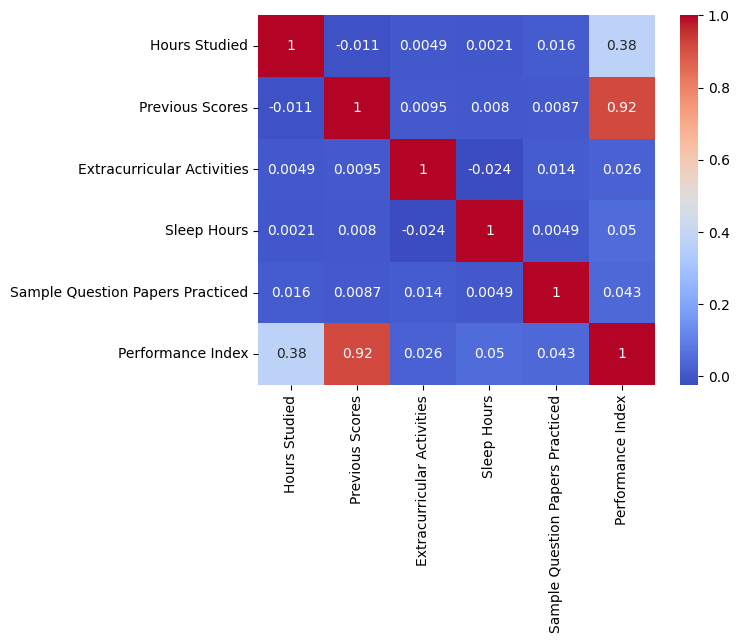

In [14]:
#Colinearity Check
correlation_matrix = data_set.corr()
heatmap_plt = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# heatmap_plt.figure.set_size_inches(12, 8) 
fig=heatmap_plt.get_figure()
fig.savefig("correlation.png",dpi=300, bbox_inches='tight')

## Plotting significant variables against Dependent variable

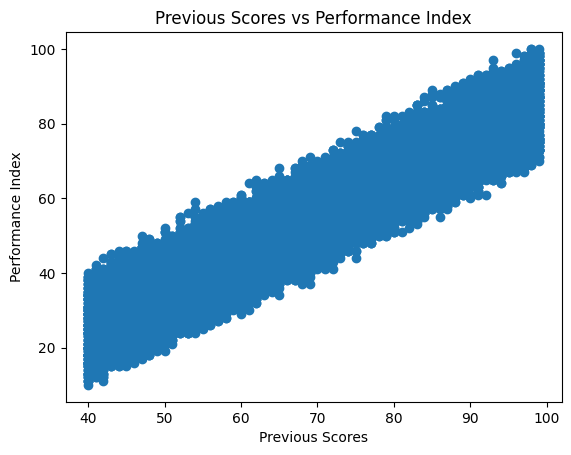

In [15]:
#Plotting significant variables against Dependent variable¶
plt.scatter(data_set['Previous Scores'],data_set['Performance Index'])
plt.title("Previous Scores vs Performance Index")
plt.xlabel("Previous Scores")
plt.ylabel("Performance Index")
plt.show()

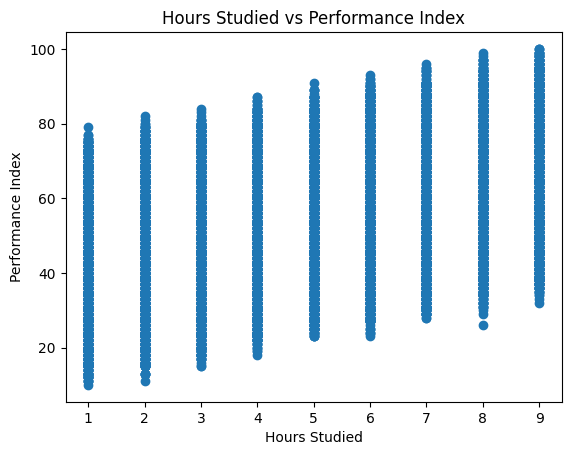

In [16]:
plt.scatter(data_set['Hours Studied'],data_set['Performance Index'])
plt.title("Hours Studied vs Performance Index")
plt.xlabel("Hours Studied")
plt.ylabel("Performance Index")
plt.show()

In [17]:
X = data_set.drop('Performance Index', axis = 1)
y = data_set['Performance Index']
X_with_const= sm.add_constant(X)

In [18]:
min_value = y.min()
max_value = y.max()
range_value = max_value - min_value
print(range_value)

90.0


## Variance Inflation Factor check for multicollinearity among predictors

In [19]:
#VIF Check among predictors
vif_data=pd.DataFrame()
# print(X.columns)
# X.shape
vif_data["Variable"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]
vif_data

,Variable,VIF
0,const,38.797757
1,Hours Studied,1.000393
2,Previous Scores,1.000350
3,Extracurricular Activities,1.000888
4,Sleep Hours,1.000676
5,Sample Question Papers Practiced,1.000540


In [20]:
X.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced'],
      dtype='object')

## Before elimination

In [21]:
x_const= sm.add_constant(X)
model = sm.OLS(y, x_const).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Performance Index   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.724e+05
Date:                Tue, 29 Oct 2024   Prob (F-statistic):               0.00
Time:                        18:35:48   Log-Likelihood:                -21065.
No. Observations:                9873   AIC:                         4.214e+04
Df Residuals:                    9867   BIC:                         4.219e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                              -34.0689      0.128   -265.875      0.000     -34.320     -33.818
Hours Studied                        2.8527      0.008    358.940      0.000       2.837       2.868
Previous Scores                      1.0183      0.001    857.427      0.000       1.016       1.021
Extracurricular Activities           0.6167      0.041     14.981      0.000       0.536       0.697
Sleep Hours                          0.4803      0.012     39.623      0.000       0.457       0.504
Sample Question Papers Practiced     0.1939      0.007     27.017      0.000       0.180       0.208
==============================================================================
Omnibus:                        3.123   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.210   Jarque-Bera (JB):                3.224
Skew:                           0.014   Prob(JB):                        0.200
Kurtosis:                       3.084   Cond. No.                         451.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Backward elimination with AIC score

In [22]:
#Backward elimination with AIC score
def backward_selection_with_aic(y, x: pd.DataFrame) -> (sm.regression.linear_model.RegressionResults, pd.DataFrame):
    col=x.columns
    x_const= sm.add_constant(x)
    model = sm.OLS(y, x_const).fit()
    aic = model.aic
    feature_to_remove=[]
    for label in col:
        model = sm.OLS(y, x_const.drop(feature_to_remove,axis=1)).fit()
        new_aic = model.aic
        if aic > new_aic:
            feature_to_remove.pop()
            continue;
        p_values = model.pvalues
        max_p_value = p_values.max()
        if p_values.idxmax()!='const':
            feature_to_remove.append(p_values.idxmax())
        aic=new_aic
    return model, x.drop(feature_to_remove,axis=1)

In [23]:
new_model, remaining_x = backward_selection_with_aic(y, X)
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Performance Index   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 3.424e+05
Date:                Tue, 29 Oct 2024   Prob (F-statistic):               0.00
Time:                        18:35:48   Log-Likelihood:                -22187.
No. Observations:                9873   AIC:                         4.438e+04
Df Residuals:                    9870   BIC:                         4.440e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -29.8189      0.105   -282.693      0.000     -30.026     -29.612
Hours Studied       2.8574      0.009    320.997      0.000       2.840       2.875
Previous Scores     1.0192      0.001    766.139      0.000       1.017       1.022
==============================================================================
Omnibus:                        2.272   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.321   Jarque-Bera (JB):                2.285
Skew:                           0.017   Prob(JB):                        0.319
Kurtosis:                       3.067   Cond. No.                         329.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
remaining_x

,Hours Studied,Previous Scores
0,7,99
1,4,82
2,8,51
3,5,52
4,7,75
...,...,...
9995,1,49
9996,7,64
9997,6,83
9998,9,97


## Split data

In [25]:
X_train, X_test, y_train, y_test = train_test_split(remaining_x, y, test_size=0.3, random_state=42)
X_train_const= sm.add_constant(X_train)

In [26]:
print("X train", X_train)
print("X test",X_test)

X train       Hours Studied  Previous Scores
4066              7               84
7268              6               82
3715              8               83
5619              6               60
9311              3               94
...             ...              ...
5771              2               46
5221              9               60
5424              5               95
860               1               47
7337              9               84

[6911 rows x 2 columns]
X test       Hours Studied  Previous Scores
6099              4               64
106               7               90
9265              6               73
4707              3               43
2155              9               76
...             ...              ...
4442              2               97
9458              6               59
5878              6               42
2638              1               78
7665              2               87

[2962 rows x 2 columns]


In [28]:
model = sm.OLS(y_train, X_train_const).fit()
print(model.summary(alpha = 0.05))

                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 2.456e+05
Date:                Tue, 29 Oct 2024   Prob (F-statistic):               0.00
Time:                        18:52:17   Log-Likelihood:                -15461.
No. Observations:                6911   AIC:                         3.093e+04
Df Residuals:                    6908   BIC:                         3.095e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -29.7667      0.124   -2

In [29]:
X_test_const= sm.add_constant(X_test)
y_pred=model.predict(X_test_const)
rmse = root_mean_squared_error(y_test, y_pred)
print(f'\nRoot Mean Squared Error for the model: {rmse:.2f}')


Root Mean Squared Error for the model: 2.34


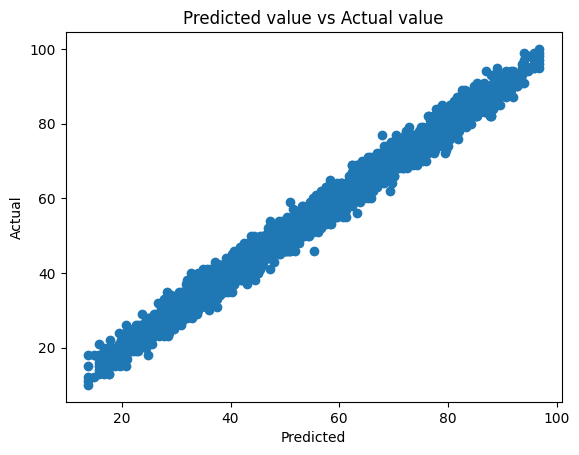

In [30]:
plt.scatter(y_pred,y_test)
plt.title("Predicted value vs Actual value")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()